In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#current_directory = os.getcwd()
current_directory = '/content/drive/MyDrive/Artigos/IQA-Belém'

In [274]:
# Select folder (place_year/band)
year = '2019-2024'
band = 'uvai' # co, no2, o3, so2, uvai
unit = 'index' # ppm, mol/m², index,
folder_name = f'dados/{band}/results'
file_name = f'{folder_name}/{band}_{year}_df.csv'

In [271]:
folder_path = os.path.join(current_directory, folder_name)
file_path = os.path.join(current_directory, file_name)

In [272]:
df = pd.read_csv(file_path)

In [273]:
df_i = df.set_index('date')
sites = df_i.columns.values

In [275]:
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df.set_index('date', inplace=True)

In [276]:
df_corr = df_i.corr().round(2)
df_corr

,arapiranga,belem,carateua,combu,cotijuba,da-barra,da-cintra,das-oncas,grande,jutuba,mirim,mosqueiro,murucutu,paqueta,sao-pedro
arapiranga,1.00,0.82,0.78,0.76,0.78,0.83,0.76,0.89,0.73,0.77,0.86,0.76,0.73,0.82,0.70
belem,0.82,1.00,0.86,0.85,0.79,0.89,0.82,0.88,0.84,0.80,0.81,0.83,0.85,0.79,0.79
carateua,0.78,0.86,1.00,0.76,0.81,0.79,0.75,0.78,0.78,0.86,0.81,0.87,0.77,0.81,0.88
combu,0.76,0.85,0.76,1.00,0.75,0.74,0.96,0.83,0.90,0.74,0.74,0.77,0.93,0.75,0.72
cotijuba,0.78,0.79,0.81,0.75,1.00,0.74,0.75,0.76,0.74,0.92,0.85,0.77,0.74,0.93,0.70
da-barra,0.83,0.89,0.79,0.74,0.74,1.00,0.72,0.82,0.73,0.77,0.84,0.77,0.74,0.77,0.71
da-cintra,0.76,0.82,0.75,0.96,0.75,0.72,1.00,0.83,0.85,0.73,0.74,0.76,0.87,0.74,0.71
das-oncas,0.89,0.88,0.78,0.83,0.76,0.82,0.83,1.00,0.79,0.75,0.77,0.80,0.80,0.75,0.74
grande,0.73,0.84,0.78,0.90,0.74,0.73,0.85,0.79,1.00,0.74,0.73,0.79,0.98,0.73,0.73
jutuba,0.77,0.80,0.86,0.74,0.92,0.77,0.73,0.75,0.74,1.00,0.86,0.78,0.74,0.93,0.73


In [277]:
df_resume = pd.DataFrame()

years = {2019,2020,2021,2022,2023}

for year in years:
  temp = df[df['year']==year]
  temp.drop('year', axis=1, inplace=True)


  belem_corr = temp.corr().loc['belem']
  mean_values = temp.mean()
  min_values = temp.min()
  max_values = temp.max()
  year_col = [year] * len(temp.columns)

  print(f'{len(sites)}, {len(belem_corr)}, {len(mean_values)}, {len(min_values)}, {len(max_values)}, {len(year_col)}')


  resume = pd.DataFrame({
    'sites': sites,
    'ρ-Belem': belem_corr,
    f'Mean ({unit})': mean_values,
    'Min': min_values,
    'Max': max_values,
    'year': year_col
  })

  #resume.reset_index(drop=True, inplace=True)

  df_resume = pd.concat([df_resume, resume], ignore_index=True)


df_resume


15, 15, 15, 15, 15, 15
15, 15, 15, 15, 15, 15
15, 15, 15, 15, 15, 15
15, 15, 15, 15, 15, 15
15, 15, 15, 15, 15, 15


<ipython-input-277-a2cb63a5fb10>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop('year', axis=1, inplace=True)
<ipython-input-277-a2cb63a5fb10>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop('year', axis=1, inplace=True)
<ipython-input-277-a2cb63a5fb10>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop('year', axis=1, inplace=True)
<ipython-input-277-a2cb63a5fb10>:7: SettingWithCopyWarning: 
A value is t

,sites,ρ-Belem,Mean (index),Min,Max,year
0,arapiranga,0.670468,-1.178684,-3.066833,1.389723,2019
1,belem,1.000000,-0.982967,-2.729285,0.966219,2019
2,carateua,0.755675,-1.142453,-3.045977,0.849082,2019
3,combu,0.729184,-1.412817,-3.182131,1.086866,2019
4,cotijuba,0.591886,-1.314179,-3.137171,1.164457,2019
...,...,...,...,...,...,...
70,mirim,0.807782,-0.514785,-3.096163,1.824570,2023
71,mosqueiro,0.815937,-0.627898,-2.699865,1.361400,2023
72,murucutu,0.857780,-0.721548,-2.418016,1.889909,2023
73,paqueta,0.786339,-0.600505,-2.547583,1.186067,2023


# Graphs

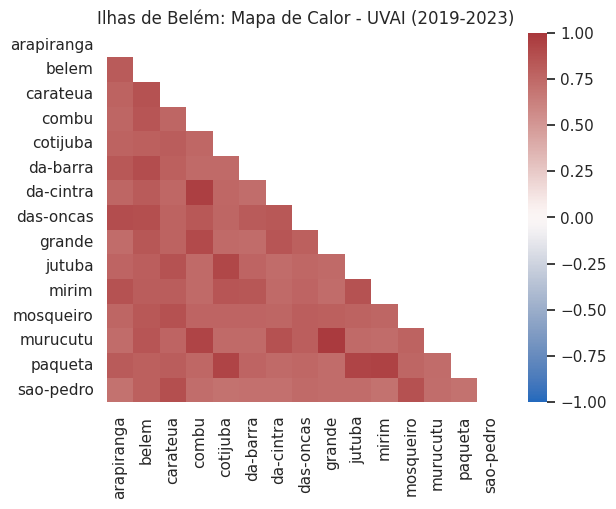

In [278]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.set(style="white")
sns.heatmap(df_corr, annot=False, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.title(f'Ilhas de Belém: Mapa de Calor - {band.upper()} (2019-2023)')
plt.savefig(f'{folder_path}/{band}_2019-2023_heatmap.jpeg', bbox_inches='tight', format='jpeg', dpi=300)
plt.show()

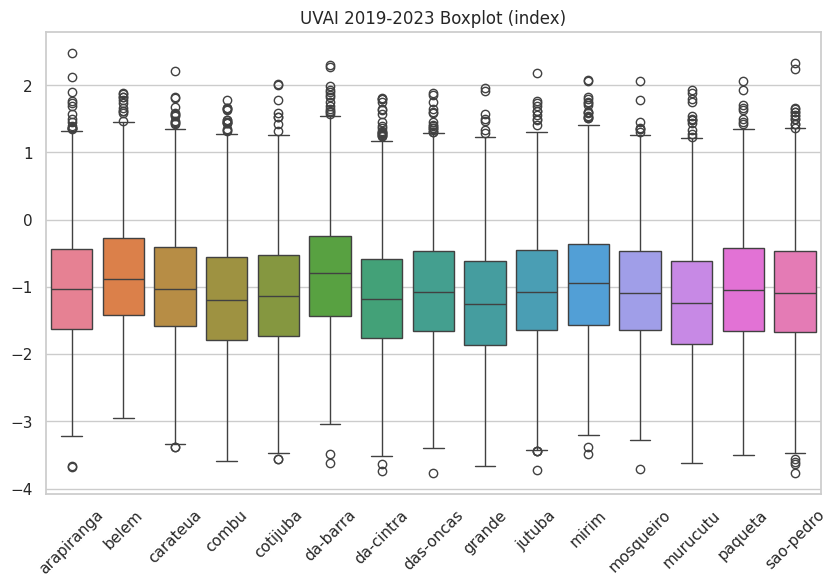

In [279]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plot = sns.boxplot(data=df_i)
plt.xticks(rotation=45)
plt.title(f'{band.upper()} 2019-2023 Boxplot ({unit})')
plt.savefig(f'{folder_path}/{band}_2019-2023_boxplot.jpeg', bbox_inches='tight', format='jpeg', dpi=300)
plt.show()

In [241]:
from matplotlib.colors import LinearSegmentedColormap, Normalize

cmap = LinearSegmentedColormap.from_list("teal_orange", ["teal", "orange"])
norm = Normalize(vmin=df_resume["ρ-Belem"].min(), vmax=df_resume["ρ-Belem"].max())
hue_values = df_resume["ρ-Belem"].unique()
palette = {hue: cmap(norm(hue)) for hue in hue_values}


<Figure size 1200x1000 with 0 Axes>

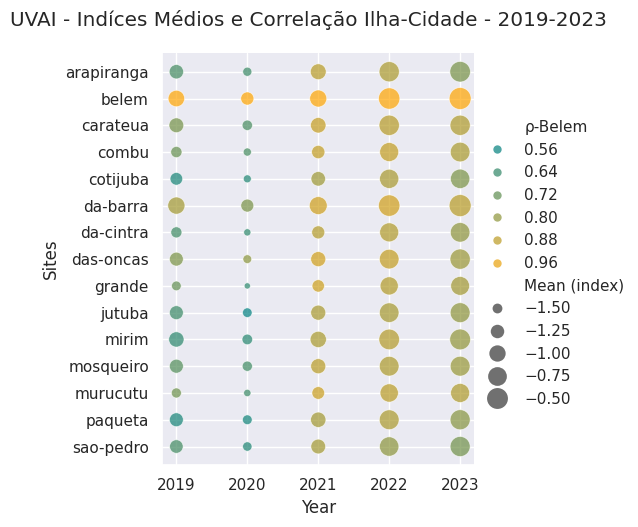

In [280]:
plt.figure(figsize=(12, 10))
sns.set(style="darkgrid")

plot = sns.relplot(data=df_resume,
                   x="year", y="sites", hue="ρ-Belem", size=f"Mean ({unit})",
                   sizes=(20, 250), palette=cmap,
                   alpha=0.7, height=5, aspect=1.0,legend="brief")



# Customize the plot
plot.set_axis_labels("Year", "Sites")
plot.fig.suptitle(f"{band.upper()} - Indíces Médios e Correlação Ilha-Cidade - 2019-2023", y=1.05)


#norm = plt.Normalize(40, 80)
#sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
#sm.set_array([])
#cbar = plot.ax.figure.colorbar(sm, ax=plot.ax, orientation='vertical', fraction=0.03, pad=0.04, aspect=15)
#cbar.set_label('RH(%)')

#for legend_obj in plot._legend.legend_handles:
#    legend_obj.set_sizes([50])

#plt.title(f'{band.upper()} {year} Value Relplot')
plt.savefig(f'{folder_path}/{band}_2019-2023_relplot.jpeg',bbox_inches='tight', format='jpeg', dpi=300)

plt.show()


In [ ]:
#teste
plt.figure(figsize=(12, 10))
sns.set(style="darkgrid")

plot = sns.relplot(data=df_resume,
                   x="year", y="sites", hue="ρ-Belem", size="Mean",
                   sizes=(100, 500), palette="viridis",
                   alpha=0.7, height=8, aspect=1.0,
                   legend=False)



# Customize the plot
plot.set_axis_labels("YEAR", "Stations (Pará)")
plot.fig.suptitle("Total Precipitation (TP) and Relative Humidity (RH) Over Years for Stations in Pará", y=1.05)

# Remove the hue legend but keep the size legend
# This is a workaround to remove the hue legend while keeping the size legend
handles, labels = plot.ax.get_legend_handles_labels()
new_handles = []
new_labels = []
for handle, label in zip(handles, labels):
    if 'Mean' not in label:
        new_handles.append(handle)
        new_labels.append(label)

plot.ax.legend(new_handles, new_labels, title='TP(mm)')

# Create a color bar
norm = plt.Normalize(40, 80)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plot.ax.figure.colorbar(sm, ax=plot.ax, orientation='vertical', fraction=0.03, pad=0.04, aspect=10)
cbar.set_label('RH(%)')

#plt.title(f'{band.upper()} {year} Value Relplot')
#plt.savefig(f'{folder_path}/{band}_{year}_relplot.jpeg', bbox_inches='tight', format='jpeg', dpi=300)

plt.show()